<a href="https://colab.research.google.com/github/oktavianoandy/PCVK_Genap_2021/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week10.ipynb”. Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikutl

In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [6]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

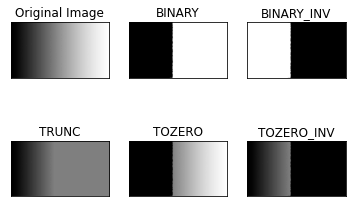

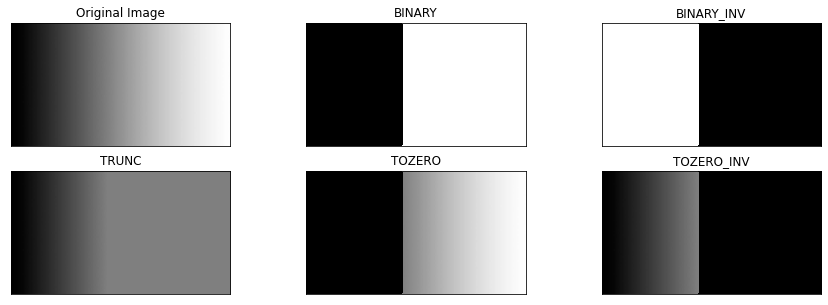

In [13]:
#Dengan Library
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/gradient.jpg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()
filename = ('/content/drive/MyDrive/PCVK_MM/Images/gradient.jpg')
#Tanpa Library
img = cv.imread(filename) 
thresh1 = cv.imread(filename) 
thresh2 = cv.imread(filename) 
thresh3 = cv.imread(filename) 
thresh4 = cv.imread(filename) 
thresh5 = cv.imread(filename)  
thresh = 127    #nilai Threshold yang ditentukan

#1. Original Image
thresh1[img>thresh] = 255     
thresh1[img<=thresh] = 0

#2. Binary threshold inverse 
thresh2 = 255 - thresh1            
#3. Threshold Truncate 
thresh3[img>thresh] = thresh        
#4. Threshold Tozero 
thresh4[img<=thresh] = 0            
#5. Threshold Tozero Inverse 
thresh5[img>thresh] = 0        
     
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV'] 
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


plt.figure(figsize = (15,5)) 
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest') 
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([]) 
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image lena_gs_lc2.jpg agar benar2 terlihat beda antara hasil otsu’s dengan global threshold biasa)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


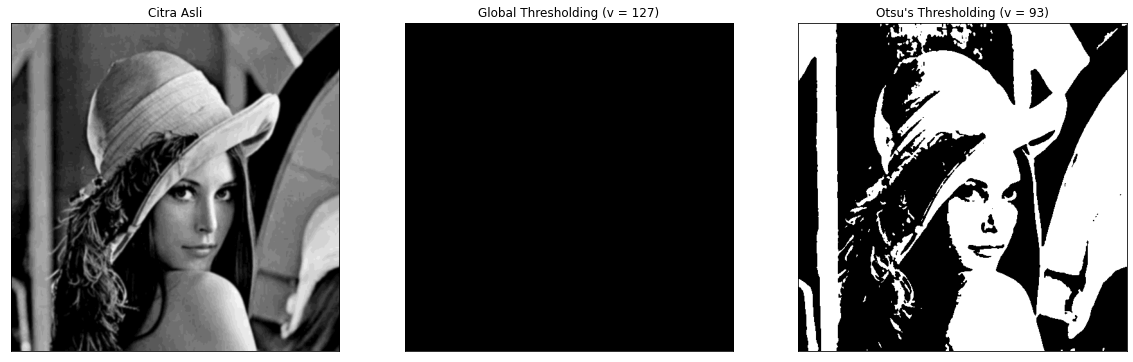

In [12]:
filename = ('/content/drive/MyDrive/PCVK_MM/Images/lena_gs_lc2.jpg')
img = cv.imread(filename,0) 
blur = cv.GaussianBlur (img, (5,5),0)

hist = cv.calcHist([blur],[0],None,[256], [0,256]) 
hist_norm = hist.ravel()/hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1 
for i in range(0,255):
  wb += hist[i] 
  wf = (img.shape[0]*img.shape[1]) - wb 
  sumb += (i*hist[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  betweenvar = wb * wf * (mb - mf) * (mb - mf) 
  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv.threshold(blur, 127, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (blur, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x] 
citra3 = [blur, th1, th2]

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image Lily atau Leaves yang sudah disediakan di folder images. Petunjuk:



*   Anda dapat gunakan cv.calcHist untuk menampilkan histogram.


*   Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

*   Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

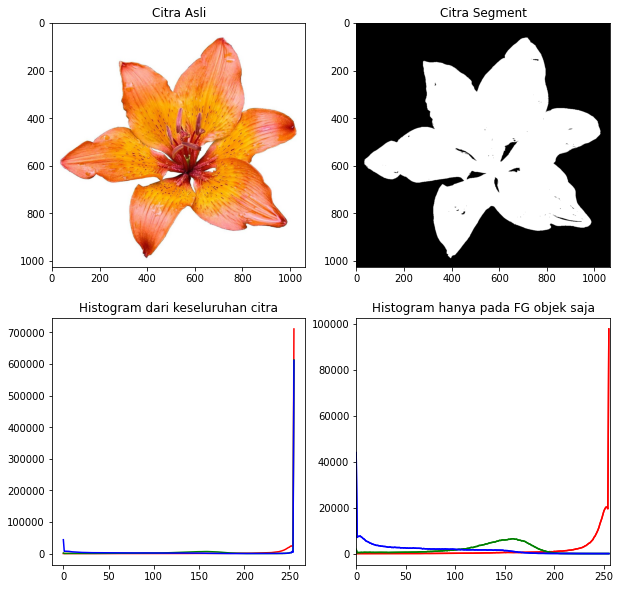

In [16]:
filename = ('/content/drive/MyDrive/PCVK_MM/Images/lily.jpg')

img = cv.imread(filename) 
img = cv.cvtColor(img,cv.COLOR_BGR2RGB) 
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya warna tertentu saja)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f6ac8eeef50>,
 <matplotlib.image.AxesImage at 0x7f6ac91f3fd0>)

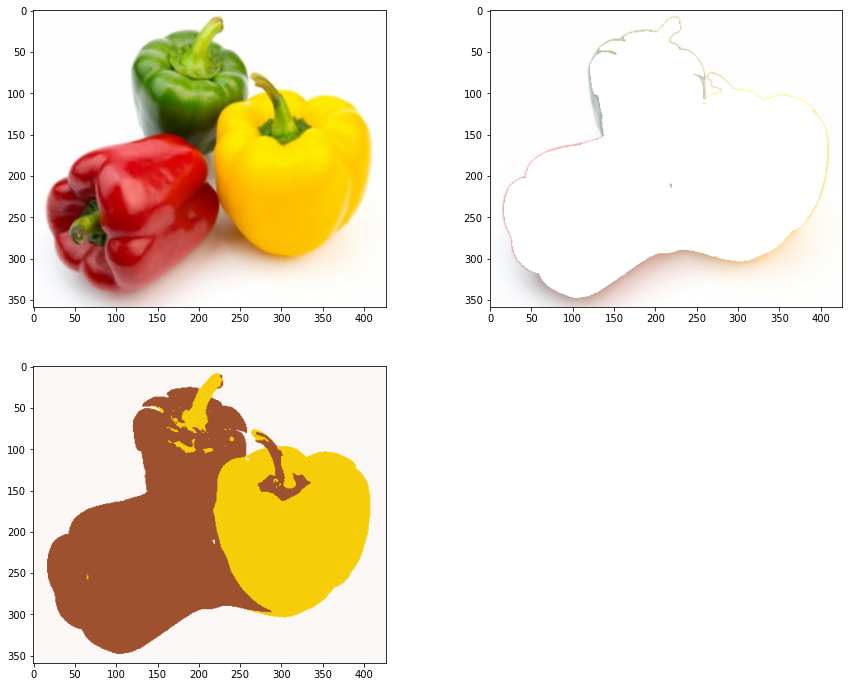

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filename = ('/content/drive/MyDrive/PCVK_MM/Images/peppers.jpg')

img = cv2.imread(filename) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


pixel_values = img.reshape((-1, 3)) 

pixel_values = np.float32(pixel_values)

#syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100 atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) <0.2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

#jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). untuk percobaan ini kita akan gunakan 3 cluster untuk image ini

k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer 
centers = np.uint8(centers)

#flattening label array 
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya 
segmented_image = centers[labels.flatten()] 
# reshape ke bentuk image asli 
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img) 
masked_image0= masked_image.reshape((-1, 3)) 
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)


plt.figure(figsize = (15,12)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.subplot(2,2,2),plt.imshow(masked_image0) 
plt.subplot(2,2,3),plt.imshow(segmented_image)

Saat anda menampilkan warna tertentu, jelaskan kendala yang di hadapi dan mengapa hal itu terjadi.

Jawab :

warna yang di dapat random berdasarkan cluster terdekat

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code dan hasil image di modul ini.

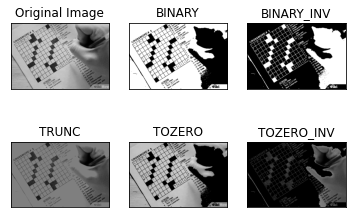

In [28]:
#Dengan Library
img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/crossword.jpg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()